# ***Import Support vector Classifier Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **Read Csv File And Draw Some Special Charts**

/tmp/ipython-input-49781152.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-49781152.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

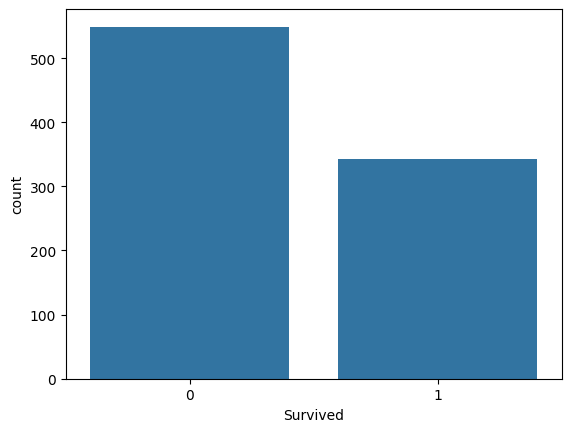

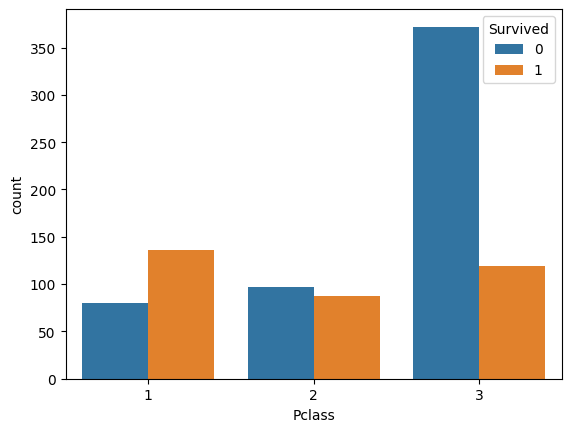

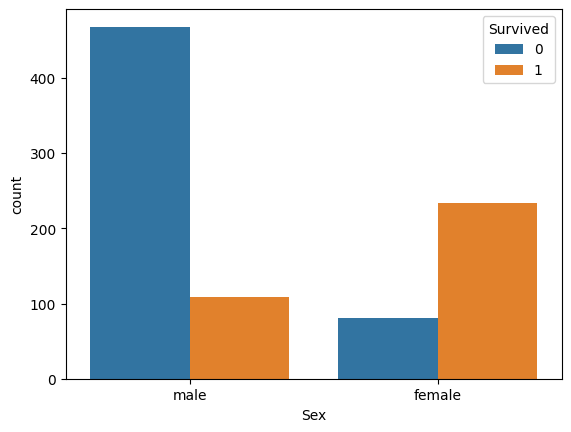

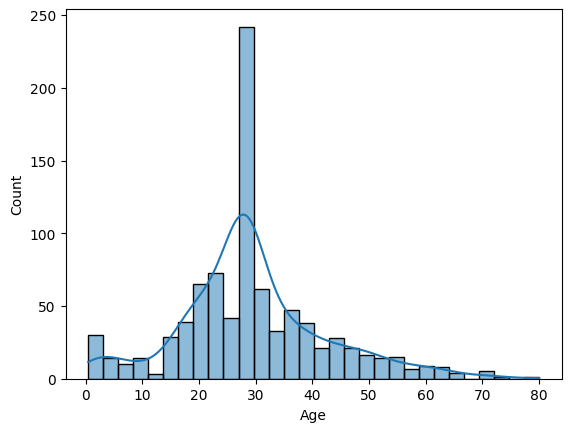

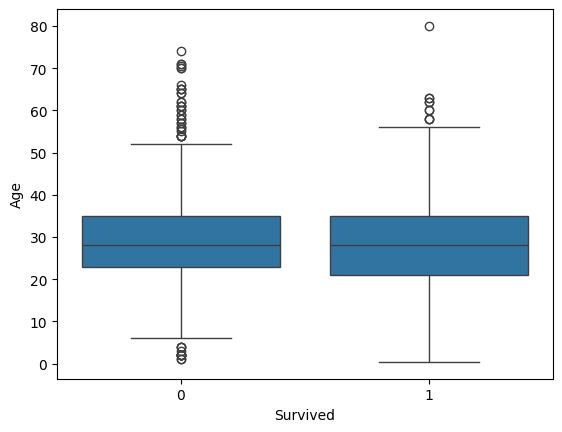

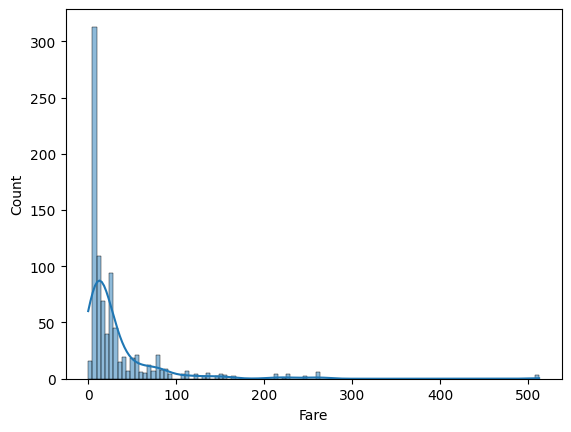

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x500 with 0 Axes>

In [2]:
df = pd.read_csv("/content/train.csv")

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

sns.countplot(x="Survived", data=df)
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

sns.histplot(df["Age"], kde=True)
plt.show()

sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

sns.histplot(df["Fare"], kde=True)
plt.show()

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# ***Apply SVM Here***

In [3]:
label_cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

X = df[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]]
y = df["Survived"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel="rbf", probability=True, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



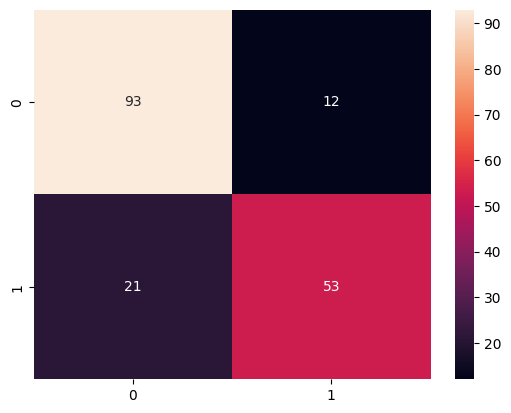

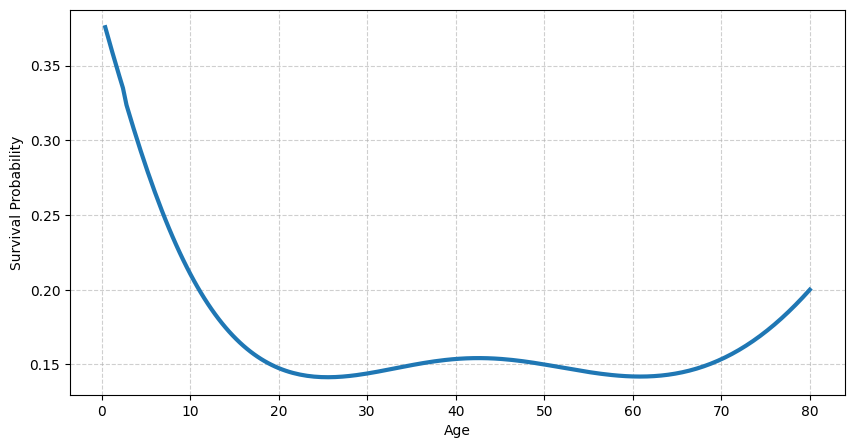

In [4]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

age_range = np.linspace(df["Age"].min(), df["Age"].max(), 200)

baseline = {
    "Pclass": 2,
    "Sex": df["Sex"].mode()[0],
    "Fare": df["Fare"].median(),
    "SibSp": 0,
    "Parch": 0,
    "Embarked": df["Embarked"].mode()[0]
}

age_df = pd.DataFrame([{**baseline, "Age": a} for a in age_range])
age_df = age_df[X.columns]

age_scaled = scaler.transform(age_df)

probs = model.predict_proba(age_scaled)[:, 1]

plt.figure(figsize=(10,5))
plt.plot(age_range, probs, linewidth=3)
plt.xlabel("Age")
plt.ylabel("Survival Probability")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()